# **GADAC - 01) Hypothesis testing**

In statistical inference, using data to assess the truth (or otherwise) of a claim is known as hypothesis testing. A statistical hypothesis is a statement hypothesizing a value for an unknown population parameter $\theta$.

> **References:**  
> A First Course in Statistical Inference, Jonathan Guillard. Springer, 2020  
> Probabilidad y estadística para ingeniería y ciencas, Walpole. Pearson, 2012  
> Google Advanced Analytics Certification, Coursera.

## **1.1) Generate a population and random samples.**

Load needed libraries

In [2]:
# Used libraries
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm as norm
import matplotlib.pyplot as plt

The population generated in this section is the one referred in the rest of the notebook. Note that sample and population sizes are defined.

In [3]:
# Define elements in population, sample size and number of samples
N = 1000
n = 15
k = 100

# Generate a random population
pop_mean = 100
pop_std = 10
population = pd.Series(norm.rvs(size=N, loc=pop_mean, scale=pop_std))
 
# Generate another random population
pop_mean_2 = 200
pop_std_2 = 40
population_2 = pd.Series(norm.rvs(size=10000, loc=pop_mean_2, scale=pop_std_2))

# Block breaker
print("="*100,"\nPopulation parameters.\n\nMean: {:.2f}\nStandard deviation: {:.2f}".format(pop_mean, pop_std), "\n"+"="*100)

Population parameters.

Mean: 100.00
Standard deviation: 10.00 


## **1.2) Central limit theorem**

States that the sampling distribution of the mean approaches a normal distribution as the sample size increases. As more observations are sampled from a population. the sample mean gets closer to the population mean. The preceding indicates that the sample mean is an unbiased estimator of the population mean.

> $E(\hat{\mu}) = E(\bar{x}) = E\left(\dfrac{1}{n} \displaystyle\sum^n_{i=1} x_i \right) = \mu$

For the the variance, the unbiased sample estimator requires the remotion of one degree of freedom.

> $E(\hat{\sigma}) = E(s^2) = E\left[\dfrac{1}{n-1} \displaystyle\sum^n_{i=1} (x_i - \bar{x}) \right] = \sigma^2$

**Note:** The central limit theorem holds true for any population. It0s not necessary to know the sahpe of the population distribution in advance to apply the theorem.

The are certain conditions that needs to be met in order to apply the CLT:  
- Randomization: The sample data must be result of a simple random selection.
- Independence: Probability of selection of one observation must not depend on the selection of another one. A thumb rule states that the sample size should not be larger than 10% of the total population.

The distribution of the sample mean is known. With the following expressions confidence intervals can be constructed. These help to describe the uncertainty surrounding an estimate. The correct interpretation of confidence interval states as follows: (1-$\alpha$)% confidence means that if repeated random samples are taken fron a population, and construct a conficence interval for each sample using the same methor, it can be expected that (1-$\alpha$)% of these intervals will capture the population mean.

> $ \hat{\mu} \sim N\left[\mu, Var(\hat{\mu}) \right] $  
> > $where:$  
> > $ Var(\hat{\mu}) = \dfrac{\sigma^2}{n} $  

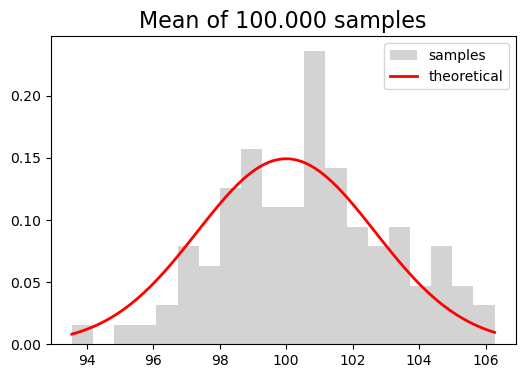

In [4]:
# Generate random samples
df_samples = pd.DataFrame()
for i in range(k):
    df_samples = pd.concat([df_samples, population.sample(n).reset_index(drop=True)], axis=1)

# Plot theoretical 
plt.figure(figsize=(6,4))
plt.hist(df_samples.mean(), bins=20, density=True, color="lightgray", label="samples")
plt.title("Mean of {:,.3f} samples".format(k), fontsize=16)

# Overlap theoretical normal distribution
x = np.linspace(df_samples.mean().min(), df_samples.mean().max(), 100)
p = norm.pdf(x, loc=pop_mean, scale=pop_std/(n-1)**0.5)
plt.plot(x,p, linewidth=2, color="red", label="theoretical")

# Display legends
plt.legend()
plt.show()

## **1.3) Hypothesis testing**

Hypothesis testing uses sample data to evaluate an assumption about a population parameter $\theta$. There are four steps for conducting a hypothesis test:

> 1) State the null hypothesis and the alternative hypothesis  
> 2) Choose a significance level ($\alpha$)  
> 3) Find the p-value  
> 4) Reject or fail to reject the null hypothesis

**1) State the null hypothesis**
THe null hypothesis and the alternative hypothesis are mutually exclusiva, meaning they cannot be true at the same time. The **null hypothesis** $(B_0)$ is a statement that is assumed to be true unless there is convincing evidence to the contrary. Typically assumes that there is no effect in the population, and that the observed data OCCURS by chance.

The **alternativee hypothesis** $(B_0)$ is a statement that contradicts the null hypothesos and is accepted as true only if there is convincing evidence for it. Typically asssumes that there is an effect in the population, and that observed data DOES NOT occur by chance.

**2) Choose a significance level**  
Confidence level expresses the uncertainty of the estimation process. It refers to the long-term success rate of the estimation process, based on random sampling. It can be arbitrarily choosen, a value of $\alpha=0.05$ is the most common.

**3) Find the p-value**
The p-value is refers to the probability of observing results as or more extreme than those observed when the null hypothesis is true. It depends on the sample distribution of the parameter in question $\theta$.

**4) Reject or fail to reject the null hypothesis**
P-value refers to the probability of observing results as or more extreme than those observed when the null hypothesis is true. For example, if p-value is 0.01, the probability of observing such sample $\hat{\theta}$ given a population parameter $\theta$ is 1.0%, therefore, it's considered that observed data DOES not occur by chance and $H_0$ is rejected.

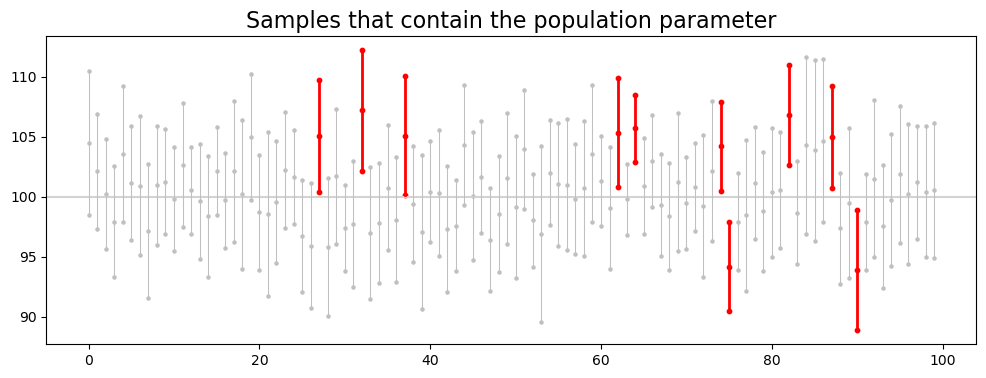

In [5]:
# Set the significance level
confidence = 0.05

# Sample population
df_samples = pd.DataFrame()
for i in range(k):
    df_samples = pd.concat([df_samples, population.sample(n).reset_index(drop=True)], axis=1)

# Compute confidence intervals
df_intervals = pd.DataFrame(df_samples.mean(axis=0).reset_index(drop=True))
df_intervals.columns = ["mean"]
df_intervals["lower"] = df_intervals["mean"] - norm.ppf(1-confidence/2) * df_samples.std(ddof=1).reset_index(drop=True) / n**0.5
df_intervals["upper"] = df_intervals["mean"] + norm.ppf(1-confidence/2) * df_samples.std(ddof=1).reset_index(drop=True) / n**0.5
df_intervals["contains"] = (df_intervals["lower"] <= pop_mean) & (df_intervals["upper"] >= pop_mean)

# Create graph
plt.figure(figsize=(12,4))
plt.axhline(y=pop_mean, color="lightgray", label="Population mean")
for i in range(k):
    color = "silver" if df_intervals["contains"].iloc[i] else "red"
    width = 0.75 if df_intervals["contains"].iloc[i] else 2
    size = 5 if df_intervals["contains"].iloc[i] else 10
    lower = df_intervals["lower"].iloc[i]
    mean = df_intervals["mean"].iloc[i]
    upper = df_intervals["upper"].iloc[i]
    plt.plot((i,i), (lower,upper), color=color, linewidth=width)
    plt.scatter((i,i,i), (lower, mean,upper), s=size, color=color)
plt.title("Samples that contain the population parameter", fontsize=16)
plt.show()

## **1.4) Type 1 and type 2 errors**

Because hypothesis testing is based on probability, there's always chance of drawing the wrong conclusion about the null hypothesis. When deciding to reject or fail to reject the null hypothesis there are four possible outcomes. Two represent the correct choice, and two represent errors.

| | Null hypothesis <br> is TRUE | Null hypothesis <br> is FALSE |
|--|---------|-----|
| **Reject null <br> hypothesis**   | _Type 1 error_   | _Ok_ |
| **Accept null <br> hypothesis**     | _Ok_     | _Type 2 error_ |

**Type 1 error**  
Also knwon as a **false positive** occurs when a null hypothesis that is actually true is rejected. In other words, the conclusion is that the result is statistically significant when in fact it occurred by chance. The probability of making a Type 1 error is called $\alpha$, the significance level. When is set to 0.05, the probabity of incurring in this error is 5%. Is the risk that the statistician is willing to accept, an $\alpha$% chance  to be wrong when rejecting the null hypothesis.

**Type 2 error**  
Reducing the risk of making a Type 1 error means is more likely to make a Type 2 error or **false negative**. Occurs when is failed to reject a null hypothesis which is actually false. In other words, it's concluded that the result occcured by chance when it's not. The probability of making a type 2 error is called $\beta$. Is related to the power of a statistical test.
> $\beta = P\left(Accept \; H_0 | \; H_0 \;is\;false \right)$  
>
> $power = (1-\beta$)  
>
> $power = P\left( Reject \; H_0 \; | \; H_1 \;is\;true \right)$

In [6]:
# Block breaker
print("="*100,"""
Computing the power of a statistical test and the probability of Type 2 error
involves knowing the sample distribution of H0 and HA. Then an area differencing
is sufficient to carry outthe calculations.""", "\n"+"="*100)

Computing the power of a statistical test and the probability of Type 2 error
involves knowing the sample distribution of H0 and HA. Then an area differencing
is sufficient to carry outthe calculations. 


## **1.5) Testing for mean**

### **One sample and one population.**

Hypothesis testing uses the CLT to test the statistical significance of a hypothesis. In this example **one population** means and **one sample** are used to formulate and test hypothesis on them. When the population variance $\sigma$ is unknow and needs to be estimated with $\hat{\sigma}$, a Student's t distribution is used to account for the loss of degrees of freedom. THerefore, the distribution of the sample mean is follows the form:
> $\hat{\mu} \sim t_{(n-1)} \left[ \hat{\mu}, \dfrac{\hat{\sigma}^2}{n} \right] $  

Given a certain value $\mu_0$ the hypothesis that can be formulated for one sample are the following:  
**Two tails**  
> $H_0: \mu = \mu_0$  
> $H_0: \mu \neq \mu_0$  

**One tail:**  
> $H_0: \mu \geq \mu_0$  
> $H_0: \mu \leq \mu_0$  

**Notes:**  
> Since the distribution are continous, considering $\leq$ or $<$ will yield the same result  
> When the sample size is less than 30 or the variance is estimated, using Student's t distribution is required to account for the additional variability.

In [7]:
# Output
print("="*100)

# Test if the population mean is equal to 200
mu_0 = 250
sample = population.sample(n)
tstat = (sample.mean() - mu_0) / sample.std(ddof=1) / n**0.5
pvalue = stats.t.cdf(x=tstat, loc=0, scale=1, df=n-1)
print("Ho: mu={:.0f}\n".format(mu_0))
print("The pvalue ({:.3f}) is less than the significance level (0.025) (two tails test).\nTherefore, the null hypothesis is rejected.\n".format(pvalue)+
      "In other words, the population mean is not equal to {:.0f}".format(mu_0)+"\n"+"="*100)

# Test if the population mean is less than 200
tstat = (mu_0 - sample.mean())/ sample.std(ddof=1) /n**0.5
pvalue= stats.t.cdf(x=tstat, loc=0, scale=1, df=n-1)
print("H0: mu < {:.0f}".format(mu_0)+"\n")
print("The probability of obtaining a sample from a population that satisfies H0 is: {:.3f}".format(pvalue))
print("Therefore the null hypothesis is failed to be rejected")
print("The population mean is less than {:.0f}".format(mu_0))
print("="*100)

Ho: mu=250

The pvalue (0.004) is less than the significance level (0.025) (two tails test).
Therefore, the null hypothesis is rejected.
In other words, the population mean is not equal to 250
H0: mu < 250

The probability of obtaining a sample from a population that satisfies H0 is: 0.996
Therefore the null hypothesis is failed to be rejected
The population mean is less than 250


### **Two samples and two populations**

When performing an AB test, usually two means are requited to be compared. Since the two populations are unkwnon, is expected to work with two samples and the usual formulated hypothesis are the following:

**Two tails**
> $H_0: \mu_1 = \mu_2$

**One tail**
> $H_0: \mu_1 < \mu_2  
> $H_0: \mu_1 > \mu_2

The statistical basis for these test is that is known the distribution that follows the lineal combination of the two sample mean distributions. Therefore, p-values are enabled to be calculated and hypothesis can be tested. The distribution of the difference of two normals is the following.

> $given \quad$  $X \sim N(\mu_1, {\sigma_1}^2)$ $\;and\;$ $Y \sim N(\mu_2, {\sigma_2}^2) $  
>  
> $then \quad$ $ X+Y \sim N\left( \mu_1 + \mu_2 \;,\; \dfrac{{\sigma_1}^2 / n_1}{{\sigma_2}^2 / n_2} \right) $

**Notes:**  
> When working with different variances ${\sigma_1}^2$ and ${\sigma_1}^2$, the degrees of freedom of the Student's distribution ins approximated. In these cases is recommended to use a statistical package to compute the pvalue.

In [8]:
# First hypothesis test. H0: mu_1 = mu_2
sample = population.sample(n)
sample_2 = population_2.sample(n)
pvalue = stats.ttest_ind(a=sample, b=sample_2, equal_var=False, alternative="two-sided").pvalue
print("="*100)
print("H0: mu_1 = mu_2\n")
print("The pvalue is {:.4f}. It refers to the probability of observing such results if H0 was true.".format(pvalue))
print("Given a signifcance of 0.05 (two tails), the null hypothesis is rejected.")
print("In other words, the samples come from populations with different means.","\n"+"="*100)

# Second hypothesis test. H0: mu_1 < mu_2
pvalue = stats.ttest_ind(a=sample, b=sample_2, equal_var=False, alternative="greater").pvalue
print("H0: mu_1 < mu_2\n")
print("The pvalue is {:.4f}. It refers to the probability of observing such results if H0 was true.".format(pvalue))
print("Given a signifcance of 0.025 (one tail), the null hypothesis fails to be rejected.")
print("In other words, the first population have a lower mean that the second one","\n"+"="*100)


H0: mu_1 = mu_2

The pvalue is 0.0000. It refers to the probability of observing such results if H0 was true.
Given a signifcance of 0.05 (two tails), the null hypothesis is rejected.
In other words, the samples come from populations with different means. 
H0: mu_1 < mu_2

The pvalue is 1.0000. It refers to the probability of observing such results if H0 was true.
Given a signifcance of 0.025 (one tail), the null hypothesis fails to be rejected.
In other words, the first population have a lower mean that the second one 


## **1.6) Testing for proportion**

### **One sample and one population**

The main difference with the hypothesis testing for a mean is that the underlying distribution generating the results is not supossed to be normal. In this section the CLT is not applied. Instead, a binomial distribution is used and the probabilities necessaries to test hypothesis are computed from it. Remember that the binomial distribution has the following form. In general, the procedure of hypothesis testing is the same as the one revised previously.

> $if \quad X \sim Bin(\theta,n) \quad ; \quad x \in (0,n) $
>   
> $then \quad P(X = x) = \left(\ \dfrac{n}{x} \right) \theta^x (1-\theta)^{n-x} $

**Notes:**
> Since the binomial distribution is a discrete, the accumulated density function is computed with  
> $ P(X \leq x ) = \displaystyle \sum^x_{i=0} P(X=x)$
>  
> The computation of $\left( \dfrac{n}{x} \right)$ scales quickly in computational resources. For this reason sometimes is approximated with a normal or a Poisson distribution. The use of statistical software is recommended when dealing with hypothesis testing of proportions.

In [9]:
# First hypothesis testing. H0: p=0.50
is_even = (population.round(0) % 2)
sample = is_even.sample(n)
x = int(sample.sum())
pvalue = stats.binomtest(x, n, p=0.50, alternative="two-sided").pvalue
print("="*100+"\n"+"H0: p=0.50 | Same number of even and odd numbers\n")
print("Accepting the null hypothesis, the probability of observing the sample is the pvalue {:.2f}".format(pvalue))
print("Therefore, the null hypothesis is failed to be rejected.","\n"+"="*100)

# Second hypothesis testing. H0: p>0.60
pvalue = stats.binomtest(x, n, p=0.80, alternative="less").pvalue
print("H0: p>0.80 | The proportion of even numbers is greater than 80%")
print("\nAccepting the null hypothesis, the probability of observing the sample is the pvalue {:.2f}".format(pvalue))
print("Therefore, the null hypothesis is rejected.","\n"+"="*100)

H0: p=0.50 | Same number of even and odd numbers

Accepting the null hypothesis, the probability of observing the sample is the pvalue 0.61
Therefore, the null hypothesis is failed to be rejected. 
H0: p>0.80 | The proportion of even numbers is greater than 80%

Accepting the null hypothesis, the probability of observing the sample is the pvalue 0.06
Therefore, the null hypothesis is rejected. 


### **Two samples and two populations**

The exact distribution of the difference of the parameters $\theta_1$ and $\theta_2$ is unknown. To perform the comparisson the **Asymptotic Normality Theorem** is utilized. The theorem states that, under certain conditions (iid, finite variance, asymptotic unbias, etc.), estimators of parameters will be approximately normally distributed as the sample size increases. This therem generalizes the Central Limit Theorem to a broaded class of estimators beyond just the sample mean.  

To help the distribution achieve normality, certain transformations are required. For comparing two proportion Odds Ratio (OR) is used.
> $OR = \dfrac{\theta_1 (1-\theta_2)}{\theta_2 (1-\theta_1)}$  
>
> $Var(\hat{OR}) \approx \dfrac{1}{n_1 \theta_1} + \dfrac{1}{n_1 (1-\theta_1)} + \dfrac{1}{n_2 \theta_2} + \dfrac{1}{n_2 (1-\theta_2)}$
>   
> $\hat{OR} \sim N\left( OR, Var(\hat{OR}) \right)$

**Notes:**  
> To compare two proportions the usual method is to check the confidence intervals that are generated, if the 1 is included, it can be said that the two proportions are the same. Note that $OR \in (0,\infty)$. When the confidence interval doesn't include 1, then it can be said that $\theta_1 < \theta_2$ or viceversa.
>
> Other test can be used to compare two proportions from two samples, like a Chi squared (large sample size) or Fischer exact method (small sample size).

In [10]:
# Generate populations and sample them
male = pd.Series(stats.bernoulli.rvs(size=N, p=0.75))
female = pd.Series(stats.bernoulli.rvs(size=N, p=0.25))
sample_male = male.sample(n)
sample_female = female.sample(n)

# Compute odds ratio and variance
oddsr = male.mean() * (1-female.mean()) / (female.mean() * (1-male.mean()))
oddsr_var = 1/male.mean() + 1/(1-male.mean()) + 1/female.mean() + 1/(1-female.mean())

# Compute the confidence intervals
interval = oddsr + stats.norm.ppf([0.05/2, 1-0.05/2]) * oddsr_var**0.5

# Code breaker
print("="*100,"\nFor the odds ratio the confidence interval is\n", interval.round(2))
print("Since the 1 is not included, is concluded that the proportions are not the same")
print("The confidence interval is for values greater than 1. Is concluded that p1 > p2","\n"+"="*100)

# Alternative way
from statsmodels.stats.proportion import proportions_ztest
successes = np.array([male.sum(), female.sum()]).astype(int)
observations = np.array([male.count(), female.count()]).astype(int)

For the odds ratio the confidence interval is
 [ 4.32 17.46]
Since the 1 is not included, is concluded that the proportions are not the same
The confidence interval is for values greater than 1. Is concluded that p1 > p2 


## **1.7) Testing for variance**

### **One sample and and one population**

Before starting this section is important to point out that all theorems utilized to construct the asymptotic theory rely in the normality assumption. A procedure that is reasonably insensitive to the normality assumption is called a **robust** procedure. When a robust procedure is applied on a sample that is not normal, the results might not greatly vary. On the other hand, a non robust procedure will drastically be influenced by the fact that the sample is not normal.

**The** $\mathbf{\chi^2}$  **test on a variance IS NOT  robust procedure**  
Therefore, the data scientist should use this test under certain conditions and cautionly.

 The distribution that the sample variance follows is a Chi Square. For a one mean sample and population the statistic is computed as follows.
> $ Distribution: \quad \chi^2_{(n-1)}$
>   
> $ Test\;statistic: \quad \chi^2 = \dfrac{(n-1)s^2}{\sigma_0^2}$

The rationale and procedure to test hypothesis comparing sample variance to a given value is the same as in the previous section. The more usual hypothesis are.
> $H_0: s^2 = \sigma_0^2$
>   
> $H_0: s^2 \leq \sigma_0^2$
>   
> $H_0: s^2 \geq \sigma_0^2$

**Notes:**
> The concept of pvalue is not as useful for the hypothesis tests using a $\chi^2$ distribution. Instead, is customary to simply compare the computed statistical to the theoretical x value for the acceptance regions,

In [14]:
# Hypothesis test. sigma = 10
sigma_0 = 10
sample_var = population.sample(n).var(ddof=1)
stat = ((n-1)*sample_var)/ (10)**2
interval = stats.chi2(df=n-1).ppf([0.05,0.975])
print("="*100,"\n"+"H0: sigma=10")
print("\nThe observed statisti is: ={:.2f}=".format(stat))
print("Interval to fail to reject the null hypothesis:\n{}".format(interval.round(2)))
print("\nSince it's within the interval, the null hypothesis is accepted.","\n"+"="*100)

# Second hypothesis test. sigma > 15
sigma_0 = 15
stat = ((n-1)*sample_var)/ (10)**2
value = stats.chi2(df=n-1).ppf(0.95)
print("H0: sigma > {}\n".format(sigma_0))
print("Computed statistic: {:.2f}".format(stat))
print("Tolerance value: {:.2f}".format(value))
print("\nNull hypothesis is rejected because the statistic needs to be greater than the tolerance value"+"\n"+"="*100)

H0: sigma=10

The observed statisti is: =15.00=
Interval to fail to reject the null hypothesis:
[ 6.57 26.12]

Since it's within the interval, the null hypothesis is accepted. 
H0: sigma > 15

Computed statistic: 15.00
Tolerance value: 23.68

Null hypothesis is rejected because the statistic needs to be greater than the tolerance value


### **Two samples and two populations**

The way of conduction a hypothesis test with two sample variances is similar to the $\chi^2$ test used for one sample. The use of pvalues is not customary. The test statistic and the distribution is the following. The test is not robust and normality assumptions should be met.

> $Distribution: \quad \displaystyle F_{(n_1-1, n_2-1)}$
>
> $Test\;statistic: \quad \dfrac{s_1^2}{s_2^2}$

The most common hypothesis tested are
> $\sigma^2_1 = \sigma^2_2$  
>
> $\sigma^2_1 < \sigma^2_2$
>
> $\sigma^2_1 > \sigma^2_2$  

**Notes:**  
> The F distribution is the result of dividing two independent $\chi^2$ distributions. $\dfrac{\chi^2_{(a)}}{\chi^2_{(b)}} \sim F_{(a,b)}$ 

In [12]:
# Hypothesis test sigma_1 = sigma_1
s_1 = population.sample(n).std(ddof=1)
s_2 = population.sample(n).std(ddof=1)
stat = s_1 / s_2
interval = stats.f(dfn=n-1, dfd=n-1).ppf([0.025, 0.975])
print("="*100,"\n"+"H0: sigma_1 = sigma_1")
print("\nThe observed statisti is: ={:.2f}=".format(stat))
print("Interval to fail to reject the null hypothesis:{}".format(interval.round(2)))
print("\nSince it's within the interval, the null hypothesis is accepted.","\n"+"="*100)

# Hypothesis test sigma_1 < sigma_2
s_1 = population.sample(n).std(ddof=1)
s_2 = population_2.sample(n).std(ddof=1)
stat = s_1 / s_2
value = stats.f(dfn=n-1, dfd=n-1).ppf(0.05)
print("H0: sigma_1 < sigma_2 \n")
print("Computed statistic: {:.2f}".format(stat))
print("Tolerance value: {:.2f}".format(value))
print("\nNull hypothesis is accepted because the statistic is smaller than the tolerance value"+"\n"+"="*100)

H0: sigma_1 = sigma_1

The observed statisti is: =0.92=
Interval to fail to reject the null hypothesis:[0.34 2.98]

Since it's within the interval, the null hypothesis is accepted. 
H0: sigma_1 < sigma_2 

Computed statistic: 0.21
Tolerance value: 0.40

Null hypothesis is accepted because the statistic is smaller than the tolerance value
